<a href="https://colab.research.google.com/github/arjun820196/project_classification_titanic_survivals/blob/main/project_classification_titanic_survivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

# algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression



In [ ]:
train_df = pd.read_csv(r"/content/drive/MyDrive/Learn & Build/Data Sets/test.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/Learn & Build/Data Sets/train.csv")

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
# total = train_df.isnull().sum().sort_values(ascending=False)

In [ ]:
# percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)

In [ ]:
# total

In [ ]:
#percent

In [ ]:
# missing_tb=pd.concat([total,percent],axis=1,keys=['MissTotal','%'])

In [ ]:
# missing_tb

<ipython-input-27-2003728ea2ac>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=surv,ax=axes[0],kde=False)
<ipython-input-27-2003728ea2ac>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=

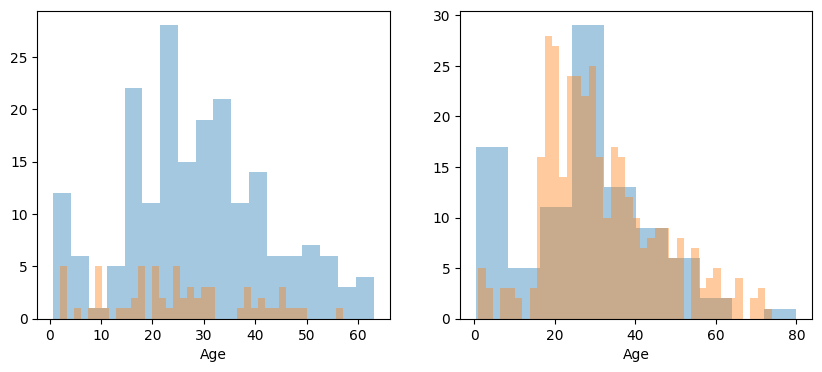

In [ ]:
surv = 'survived'
not_surv = 'not_survived'

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
men = train_df[train_df['Sex']=='male']
women = train_df[train_df['Sex']=='female']

ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=surv,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=surv,ax=axes[0],kde=False)

ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=10,label=surv,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=surv,ax=axes[1],kde=False)

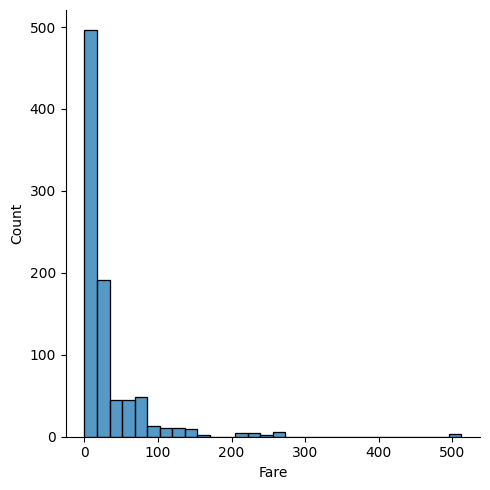

In [ ]:
sns.displot(data=train_df, x="Fare", kde=False,bins=30)

In [ ]:
# embarked, pclass and gender

In [ ]:
'''
FacetGrid = sns.FacetGrid(train_df, row='Embarked')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None)
FacetGrid.add_legend()
'''

"\nFacetGrid = sns.FacetGrid(train_df, row='Embarked')\nFacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None)\nFacetGrid.add_legend()\n"

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


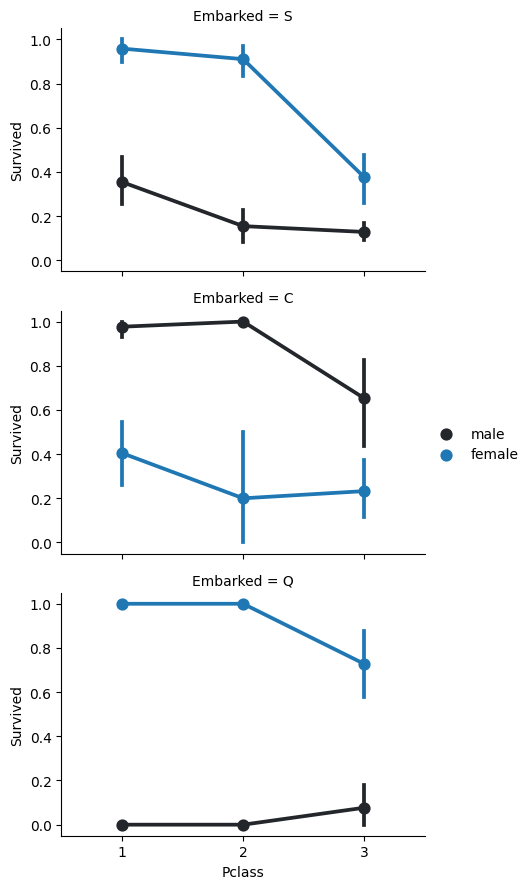

In [ ]:
g=sns.FacetGrid(train_df,row="Embarked",aspect=1.5)
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

<Axes: xlabel='Pclass', ylabel='Survived'>

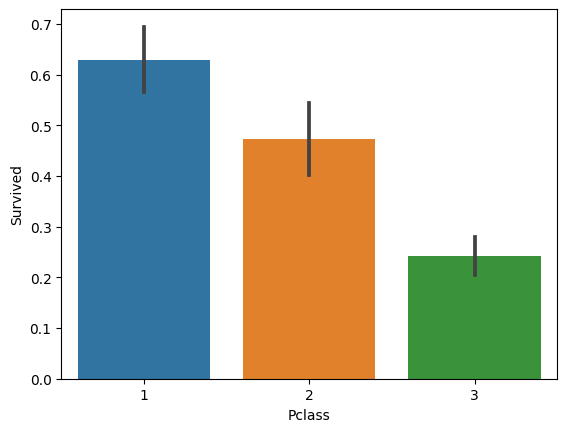

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

In [ ]:
'''
g=sns.FacetGrid(train_df,row='Pclass',col='Survived',aspect=1.5)
g.map(plt.hist,'Age')
'''

"\ng=sns.FacetGrid(train_df,row='Pclass',col='Survived',aspect=1.5)\ng.map(plt.hist,'Age')\n"

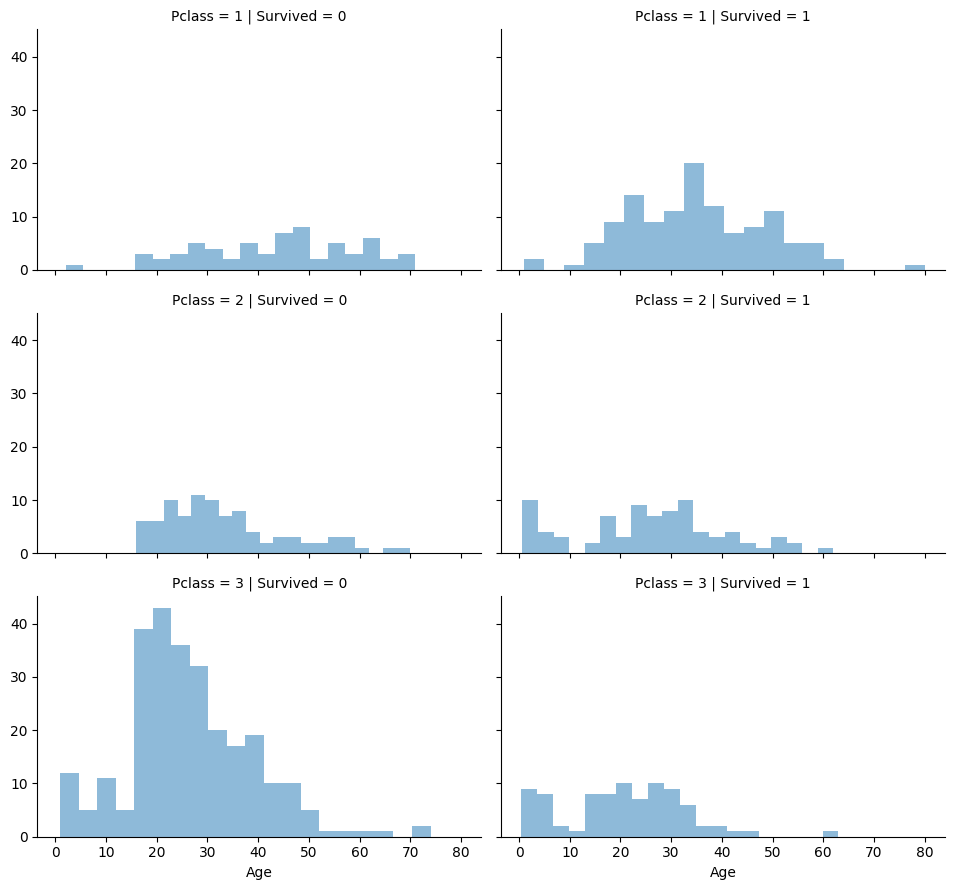

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
data = [train_df, test_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [ ]:
# axes = sns.catplot('relatives','Survived',data=train_df, aspect = 2.5, )
# axes = sns.factorplot('relatives','Survived',data=train_df, aspect = 2.5,)

In [ ]:
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)

In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [ ]:
data = [train_df, test_df]

for dataset in data:
  mean = dataset["Age"].mean()
  std = dataset["Age"].std()
  is_null = dataset["Age"].isnull().sum()
  # compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean - std, mean + std, size = is_null)
  # fill NaN values in Age column with random values generated
  age_slice = dataset["Age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset["Age"] = age_slice
  dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]
for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x))
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
common_value = 'S'
data = [train_df, test_df]
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data = [train_df, test_df]
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
# let's see how it's distributed
test_df['Age'].value_counts()

4    78
5    69
6    67
2    63
3    63
1    45
0    33
Name: Age, dtype: int64

In [ ]:
data = [train_df, test_df]
for dataset in data:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
  dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data = [train_df, test_df]
for dataset in data:
  dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.copy()

In [ ]:
#X_train

In [ ]:
#logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
#X.drop(['Survived'],axis=1,inplace=True)

In [ ]:
#X

In [ ]:
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
0,3,0,2,0,0,0,2,0,1,0,6
1,3,1,5,1,0,0,0,1,0,0,15
2,2,0,3,0,0,1,2,0,1,0,6
3,3,0,5,0,0,1,0,0,1,0,15
4,3,1,5,1,1,1,0,2,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,3,0,0,1,0,0,1,0,9
414,1,1,6,0,0,4,1,0,1,0,6
415,3,0,1,0,0,0,0,0,1,0,3
416,3,0,5,0,0,1,0,0,1,0,15


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
0,3,0,2,1,0,0,0,1,0,0,6
1,1,1,5,1,0,3,1,1,0,0,5
2,3,1,3,0,0,0,0,0,1,0,9
3,1,1,5,1,0,3,0,1,0,0,5
4,3,0,5,0,0,1,0,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,0,6
887,1,1,2,0,0,2,0,0,1,0,2
888,3,1,4,1,2,2,0,3,0,0,12
889,1,0,3,0,0,2,1,0,1,0,3


In [ ]:
Y_train=train_df['Survived']

In [ ]:
X_test=test_df.copy()

In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
0,3,0,2,0,0,0,2,0,1,0,6
1,3,1,5,1,0,0,0,1,0,0,15
2,2,0,3,0,0,1,2,0,1,0,6
3,3,0,5,0,0,1,0,0,1,0,15
4,3,1,5,1,1,1,0,2,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,3,0,0,1,0,0,1,0,9
414,1,1,6,0,0,4,1,0,1,0,6
415,3,0,1,0,0,0,0,0,1,0,3
416,3,0,5,0,0,1,0,0,1,0,15


In [ ]:
log=LogisticRegression()

In [ ]:
y_test=Y_train[:418]

In [ ]:
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=log.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
acc_log=round(log.score(X_train,Y_train)*100,2)

In [ ]:
acc_log

In [ ]:
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)

In [ ]:
accuracy

0.5023923444976076

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors =37)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_knn

75.76

Minimum error:- 0.430622009569378 at K = 1


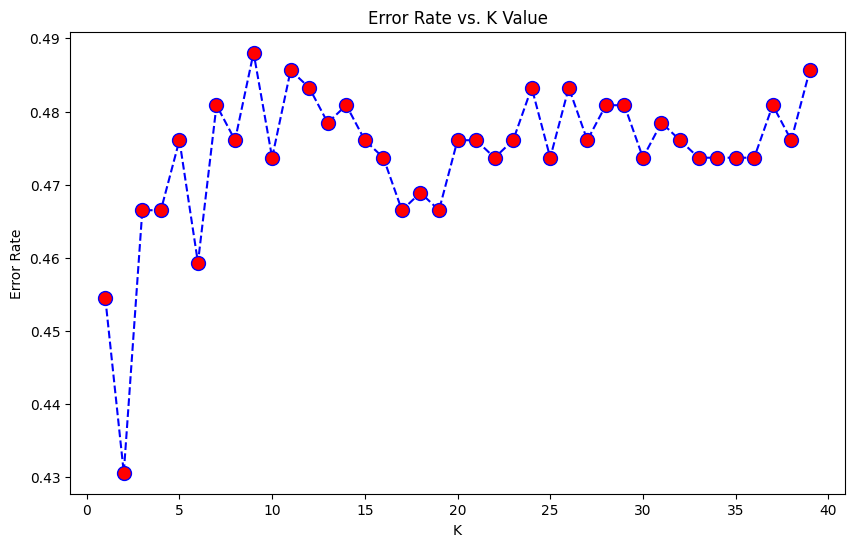

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.569377990430622 at K = 1


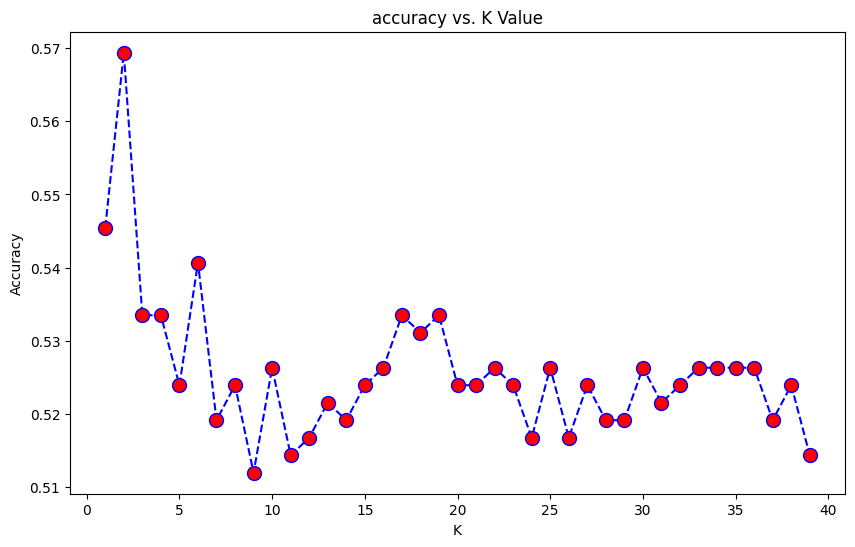

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))